# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 613
['adamstown', 'port-aux-francais', 'mount isa', 'rikaze', 'tiksi', 'lihue', 'demba', 'barra de santo antonio', 'shixing', 'grytviken', 'selfoss', 'nova sintra', 'chiredzi', 'karamay', 'bethel', 'jamestown', 'den burg', 'petropavlovsk-kamchatsky', 'iskateley', 'invercargill', 'isangel', 'carutapera', 'edinburgh of the seven seas', 'puerto natales', 'whitehorse', 'port elizabeth', 'siniscola', 'waingapu', 'saipan', 'longyearbyen', 'alofi', 'ushuaia', 'yanbu', 'haiku-pauwela', 'georgetown', 'waitangi', "oltinko'l", 'avarua', 'west island', 'olonkinbyen', 'afaahiti', 'fort bragg', 'kharkhorin', 'stanley', 'anadyr', 'murun-kuren', 'kourou', 'taiohae', 'cartagena', 'udachny', 'mumford', 'port lincoln', 'igarka', 'conception bay south', 'salahonda', 'albany', 'greenville', 'iqaluit', 'ojuelos de jalisco', 'college', 'tobi village', 'kolonia town', 'hermanus', 'kayenta', 'bilibino', 'juan griego', 'margaret river', 'broome', 'manaure', 'woolgoolga', 'thompson'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | mount isa
Processing Record 4 of Set 1 | rikaze
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | demba
Processing Record 8 of Set 1 | barra de santo antonio
Processing Record 9 of Set 1 | shixing
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | selfoss
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | chiredzi
Processing Record 14 of Set 1 | karamay
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | den burg
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | isangel
Processing Record 22 of Set 1 | carutapera
Processing 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,295.37,67,20,6.70,PN,1732482412
1,port-aux-francais,-49.3500,70.2167,277.20,76,81,11.98,TF,1732482413
2,mount isa,-20.7333,139.5000,298.02,69,100,4.63,AU,1732482415
3,rikaze,29.2500,88.8833,269.59,32,0,1.86,CN,1732482315
4,tiksi,71.6872,128.8694,250.91,92,79,6.19,RU,1732482417


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,295.37,67,20,6.70,PN,1732482412
1,port-aux-francais,-49.3500,70.2167,277.20,76,81,11.98,TF,1732482413
2,mount isa,-20.7333,139.5000,298.02,69,100,4.63,AU,1732482415
3,rikaze,29.2500,88.8833,269.59,32,0,1.86,CN,1732482315
4,tiksi,71.6872,128.8694,250.91,92,79,6.19,RU,1732482417


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

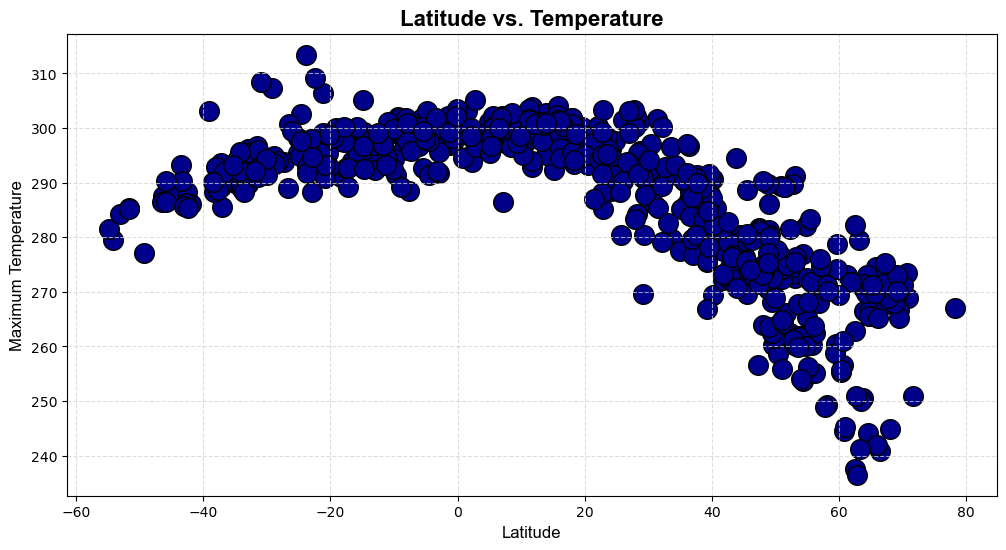

<Figure size 640x480 with 0 Axes>

In [3]:
# Build scatter plot for latitude vs. temperature
# Ripped from 5.3.7
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Max Temp"], color="darkblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Maximum Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs. Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

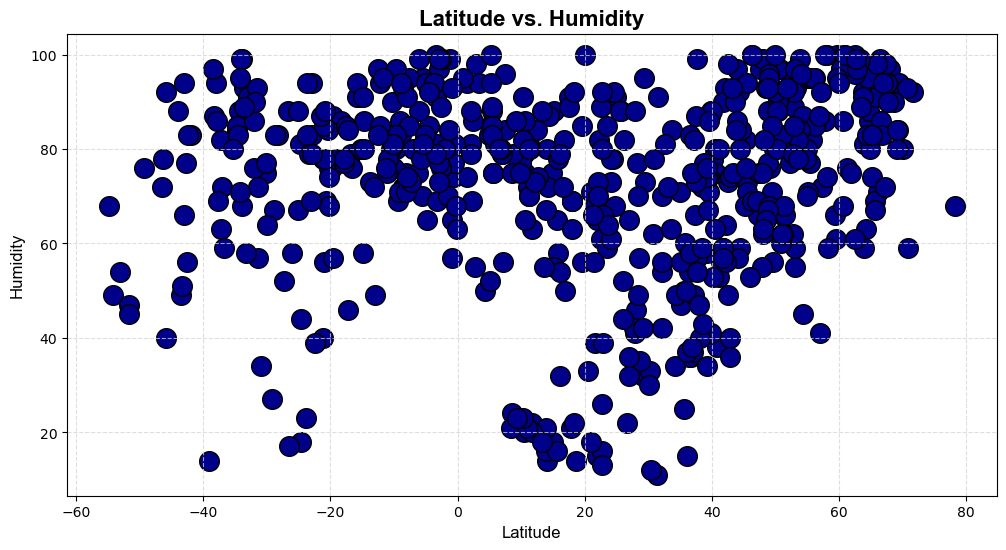

<Figure size 640x480 with 0 Axes>

In [4]:
# Build the scatter plots for latitude vs. humidity
# Ripped from 5.3.7
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Humidity"], color="darkblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs. Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

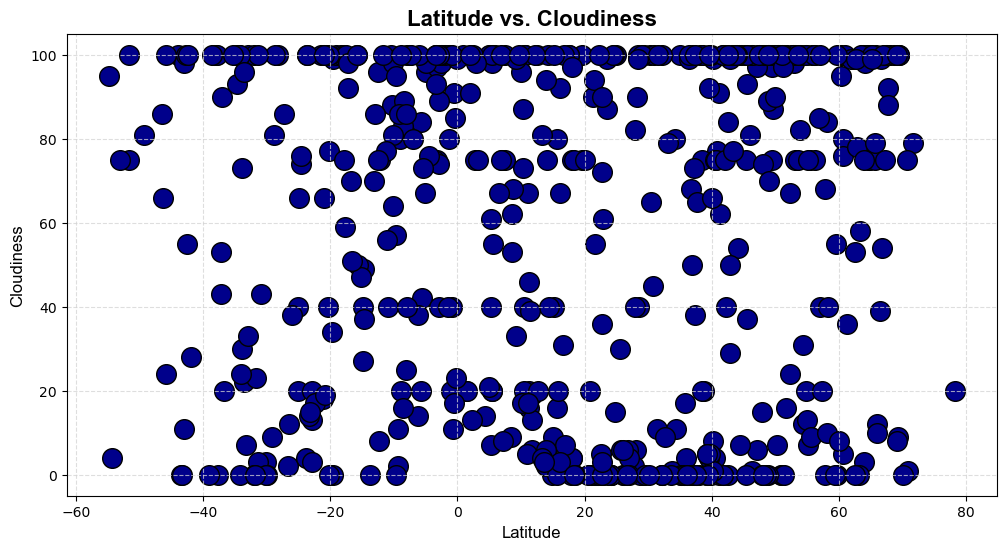

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
# Build the scatter plots for latitude vs. cloudiness
# Ripped from 5.3.7
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Cloudiness"], color="darkblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs. Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

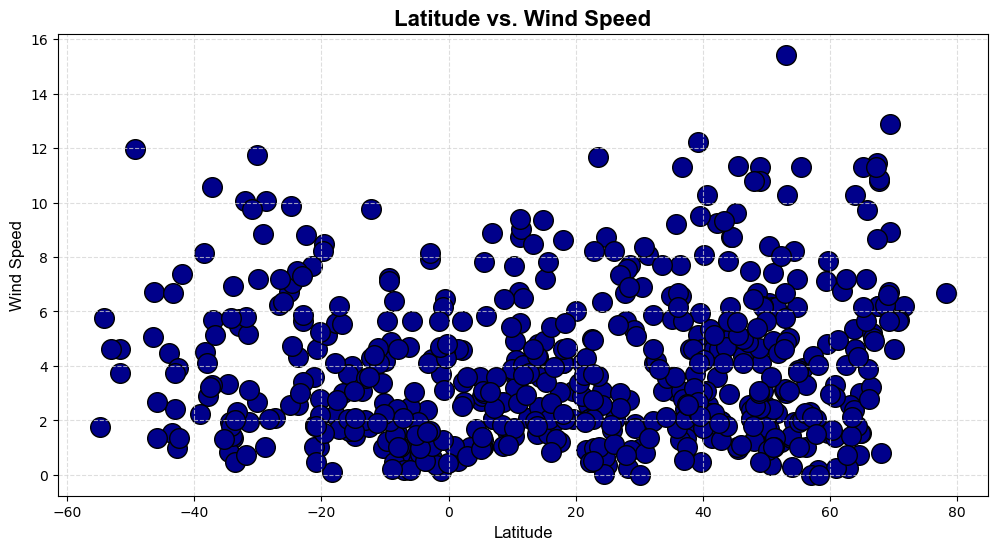

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
# Build the scatter plots for latitude vs. wind speed
# Ripped from 5.3.7
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Wind Speed"], color="darkblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs. Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# Ripped from 5.3.7
# Add the linear regression equation and line to plot
#x_values = df.Lat
#y_values = df["Max Temp"]

# do regression
def regression_plot(x_values, y_values, x_label, y_label, annotation):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #print
    print(rvalue*rvalue)
    print(line_eq)

    #Canvas size
    plt.figure(figsize=(12, 6))

    # Create a basic plot
    plt.scatter(x_values, y_values, color="darkblue", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Set X/Y Limits
    #plt.ylim(10, 16)
    #plt.xlim(0, 14)
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
                 
    # Show/Save the Graph
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = df.loc[df.Lat >= 0].reset_index(drop=True)
# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikaze,29.2500,88.8833,269.59,32,0,1.86,CN,1732482315
1,tiksi,71.6872,128.8694,250.91,92,79,6.19,RU,1732482417
2,lihue,21.9789,-159.3672,298.92,65,0,2.06,US,1732482418
3,shixing,24.9482,114.0657,290.09,91,100,0.34,CN,1732482638
4,selfoss,63.9331,-20.9971,266.41,81,3,4.61,IS,1732482641


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = df.loc[df.Lat < 0].reset_index(drop=True)
# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,295.37,67,20,6.70,PN,1732482412
1,port-aux-francais,-49.3500,70.2167,277.20,76,81,11.98,TF,1732482413
2,mount isa,-20.7333,139.5000,298.02,69,100,4.63,AU,1732482415
3,demba,-5.5100,22.2667,292.66,95,42,0.67,CD,1732482636
4,barra de santo antonio,-9.4047,-35.5072,298.93,83,2,7.21,BR,1732482637


###  Temperature vs. Latitude Linear Regression Plot

0.7180719368316137
y = -0.66x + 307.42


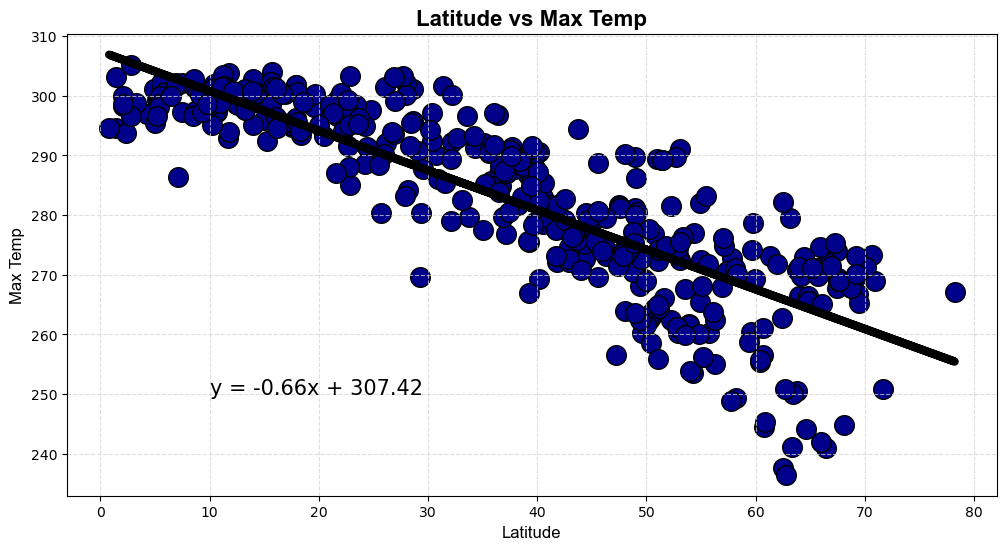

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_df.Lat
y_values = northern_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
annotation = (10,250)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.41306359525397673
y = 0.25x + 300.55


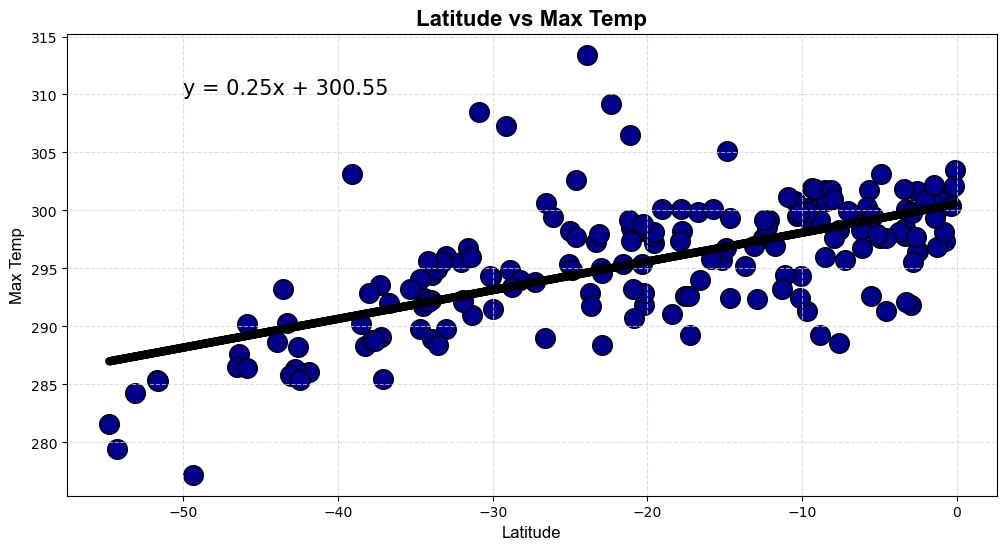

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_df.Lat
y_values = southern_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
annotation = (-50,310)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 
There is a strong negative correlation between latitude and temperature in the northern hemisphere.  In the southern hemisphere there is positive correlation between latitude and temperature.  This is demonstrated with our rvalue squared at 0.7180719368316137 and 0.41306359525397673 respectively.  It confirms the assumption that the closer you get to the equator, the hotter the temperatures.  

### Humidity vs. Latitude Linear Regression Plot

0.09967313680145924
y = 0.36x + 57.75


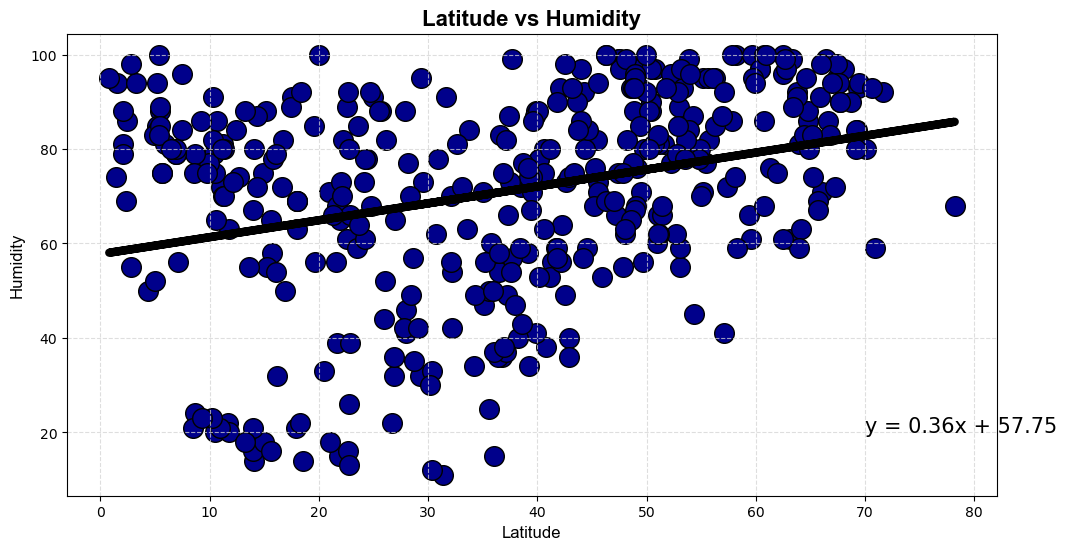

In [30]:
# Northern Hemisphere
x_values = northern_df.Lat
y_values = northern_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (70,20)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.07818525727264784
y = 0.33x + 83.18


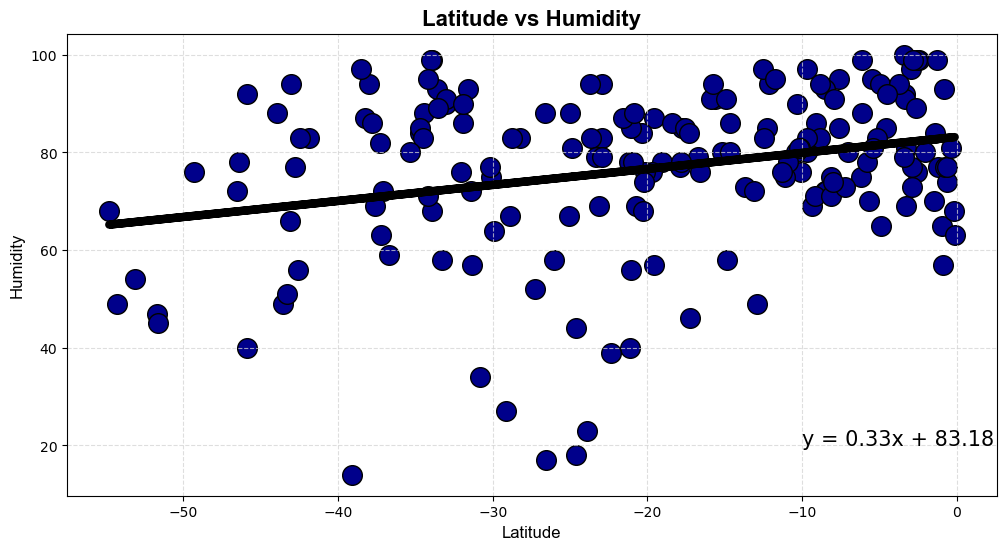

In [32]:
# Southern Hemisphere
x_values = southern_df.Lat
y_values = southern_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-10,20)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is a very weak positive correlation between latitude and humidity in both the northern and southern hemisphere. The r-values squared are 0.09967313680145924 and 0.07818525727264784 respectively.  There is no correlation between the humidity and latitude.   

### Cloudiness vs. Latitude Linear Regression Plot

0.03399511850692854
y = 0.4x + 41.67


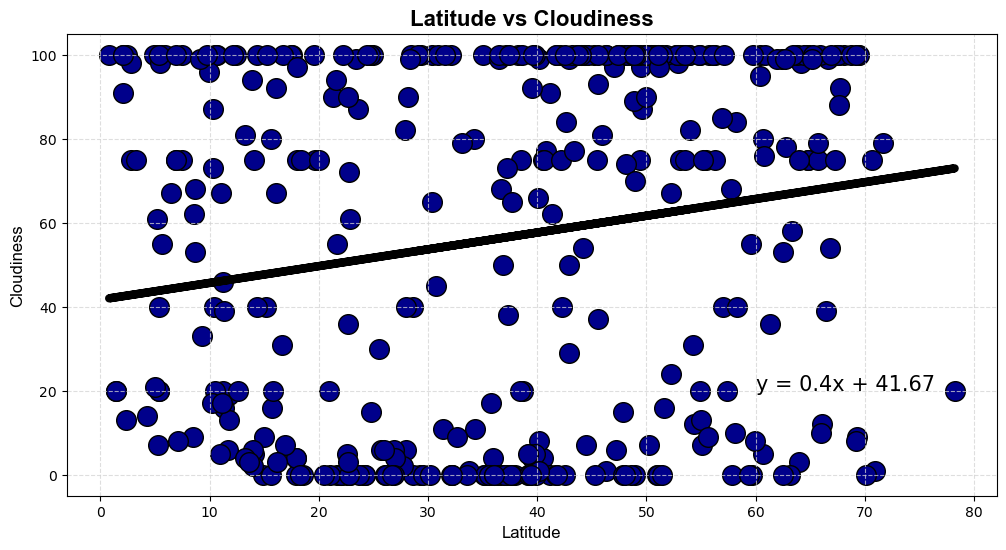

In [35]:
# Northern Hemisphere
x_values = northern_df.Lat
y_values = northern_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (60,20)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.020746712699712577
y = 0.37x + 70.51


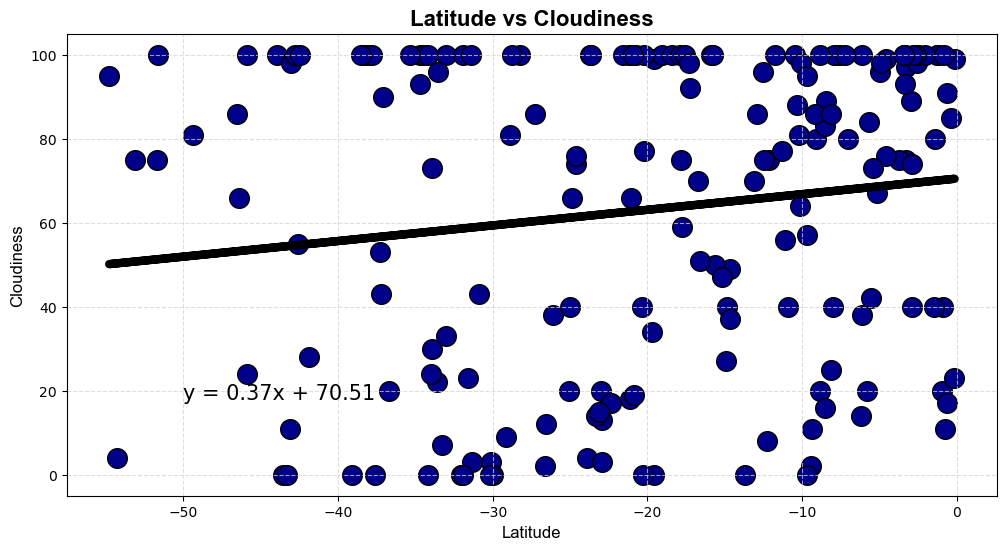

In [39]:
# Southern Hemisphere
x_values = southern_df.Lat
y_values = southern_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-50,18)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is once again a very weak positive correlation between cloudiness and humidity in both the southern and northern hemispheres.  We cannot draw conclusions from this relationship either. 

### Wind Speed vs. Latitude Linear Regression Plot

0.026939562981542826
y = 0.02x + 3.19


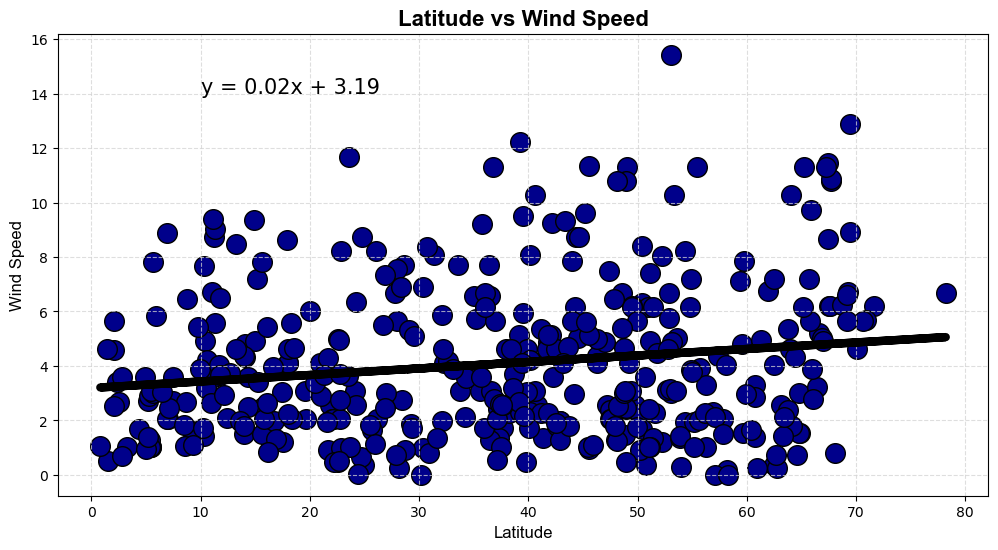

In [42]:
# Northern Hemisphere
x_values = northern_df.Lat
y_values = northern_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (10,14)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.06238794968038101
y = -0.05x + 2.75


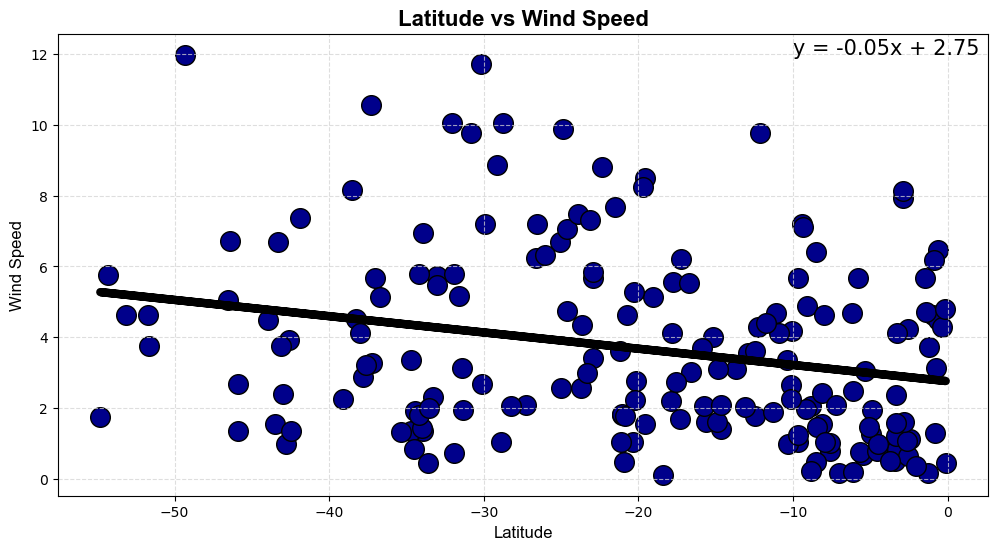

In [44]:
# Southern Hemisphere
x_values = southern_df.Lat
y_values = southern_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-10,12)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is a very weak negative correlation between latitude and wind speed in the southern hemisphere and a very weak positive correlation between latitude and wind speed in the northern hemisphere.  This leads me to believe the closer you get to the equator the less wind speed you have, but there is not much certainty in this conclusion because our r-values squared are 0.026939562981542826 and 0.06238794968038101. 